# Importing Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Getting data from GitHub

In [3]:
url = "https://raw.githubusercontent.com/Sidra-Tul-Muntaha-Ghouri/karachi-pakistan-weather-prediction/main/src/tasks/task1-collection/open_meteo.csv"
response = requests.get(url)

with open("open_meteo.csv", "wb") as f:
    f.write(response.content)
df= pd.read_csv("open_meteo.csv")

In [4]:
df.head()

,Unnamed: 0,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,0,2010-01-01,0,26.0,14.8,20.9,24.0,13.4,18.6,2010-01-01T02:16,2010-01-01T12:54,16.25,0.0,0.0,0.0,0.0,18.3,25.6,54,4.38,24.900002,67.0,8.0,Pakistan,Karachi
1,1,2010-01-02,2,25.3,15.6,20.5,21.8,13.7,18.1,2010-01-02T02:17,2010-01-02T12:54,9.15,0.0,0.0,0.0,0.0,24.6,35.3,64,3.84,24.900002,67.0,8.0,Pakistan,Karachi
2,2,2010-01-03,0,25.0,14.3,19.9,22.8,14.2,18.9,2010-01-03T02:17,2010-01-03T12:55,16.03,0.0,0.0,0.0,0.0,16.6,28.1,312,3.69,24.900002,67.0,8.0,Pakistan,Karachi
3,3,2010-01-04,0,25.6,15.0,20.4,23.9,13.7,19.4,2010-01-04T02:17,2010-01-04T12:56,16.32,0.0,0.0,0.0,0.0,14.0,22.7,353,3.63,24.900002,67.0,8.0,Pakistan,Karachi
4,4,2010-01-05,0,25.4,16.3,20.7,24.5,16.8,20.7,2010-01-05T02:17,2010-01-05T12:56,16.37,0.0,0.0,0.0,0.0,19.3,29.2,270,3.55,24.900002,67.0,8.0,Pakistan,Karachi


# Adding Weather column in the dataset.

In [5]:
weather_exp ={

0:'Clear sky or sunny weather',
1:'Partly cloudy or mostly clear weather',
2:'Cloudy or overcast weather',
3:'Fog or mist',
51:'Scattered clouds',
53:'Broken clouds',
55:'Haze or thin atmospheric particles reducing visibility',
61:'Light rain showers',
63:'Heavy rain showers',
65:'Light snow shower'
            }

In [6]:
df['weather'] = df['weathercode'].map(weather_exp)

In [7]:
df.describe()

,Unnamed: 0,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.0,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000,34762.000000
mean,17380.500000,24.229417,30.677150,23.205748,26.674475,33.920612,26.026771,29.564956,19.105281,4.496036,4.496036,0.0,5.321788,18.603832,34.039563,224.866089,4.568428,17.900002,72.585718,26.000000
std,10035.069365,27.551242,3.236343,3.615309,2.733634,4.309410,5.710073,4.509885,5.091534,12.391169,12.391169,0.0,8.286665,6.353607,9.502845,98.786400,1.553584,5.478609,3.055919,32.789843
min,0.000000,0.000000,17.700000,6.800000,13.200000,11.800000,1.400000,7.600000,0.720000,0.000000,0.000000,0.0,0.000000,4.000000,13.700000,0.000000,0.700000,8.500000,67.000000,6.000000
25%,8690.250000,1.000000,28.300000,21.700000,25.500000,31.800000,23.500000,28.200000,16.670000,0.000000,0.000000,0.0,0.000000,14.000000,27.000000,193.000000,3.620000,12.900002,69.700000,8.000000
50%,17380.500000,2.000000,30.500000,24.200000,26.800000,34.400000,27.900000,30.500000,19.570000,0.000000,0.000000,0.0,0.000000,17.300000,32.800000,251.000000,4.520000,19.099998,72.900010,12.000000
75%,26070.750000,53.000000,32.800000,25.500000,28.300000,36.800000,29.800000,32.400000,22.610000,2.800000,2.800000,0.0,9.000000,22.000000,39.200000,297.000000,5.460000,23.300003,74.900010,22.000000
max,34761.000000,65.000000,44.300000,32.500000,37.100000,47.100000,37.400000,41.100000,29.320000,307.900000,307.900000,0.0,24.000000,78.700000,123.500000,360.000000,13.280000,24.900002,76.899994,105.000000


In [8]:
df.describe(include='object')

,time,sunrise,sunset,country,city,weather
count,34762,34762,34762,34762,34762,34762
unique,4966,31881,32215,2,7,10
top,2010-01-01,2014-06-09T00:33,2014-12-20T12:38,India,Karachi,Clear sky or sunny weather
freq,7,3,3,29796,4966,7265


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34762 entries, 0 to 34761
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  34762 non-null  int64  
 1   time                        34762 non-null  object 
 2   weathercode                 34762 non-null  int64  
 3   temperature_2m_max          34762 non-null  float64
 4   temperature_2m_min          34762 non-null  float64
 5   temperature_2m_mean         34762 non-null  float64
 6   apparent_temperature_max    34762 non-null  float64
 7   apparent_temperature_min    34762 non-null  float64
 8   apparent_temperature_mean   34762 non-null  float64
 9   sunrise                     34762 non-null  object 
 10  sunset                      34762 non-null  object 
 11  shortwave_radiation_sum     34762 non-null  float64
 12  precipitation_sum           34762 non-null  float64
 13  rain_sum                    347

In [10]:
df.isna().sum()

Unnamed: 0                    0
time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
weather                       0
dtype: int64

In [11]:
df.isnull().sum()

Unnamed: 0                    0
time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
weather                       0
dtype: int64

The dataset (df) doesn't have any nan or null values.

# Changing Date Format

In [12]:
df['sunset'] = pd.to_datetime(df['sunset'])
df['sunrise'] = pd.to_datetime(df['sunrise'])

In [13]:
df['sunset_time'] = df['sunset'].dt.time
df['sunrise_time'] = df['sunrise'].dt.time

# Calculating Daylight Duration

In [14]:
# Calculate the time difference in minutes
df['daylight_duration_minutes'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 60


# Calculate the hours and minutes components
df['time_difference_hours'] = df['daylight_duration_minutes'] // 60

df['time_difference_remaining_minutes'] = df['daylight_duration_minutes'] % 60

# Convert the time difference into hours and minutes format
df['daylight_duration'] = df['daylight_duration_minutes'].apply(lambda x: f"{int(x // 60)} hours {int(x % 60)} minutes")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34762 entries, 0 to 34761
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         34762 non-null  int64         
 1   time                               34762 non-null  object        
 2   weathercode                        34762 non-null  int64         
 3   temperature_2m_max                 34762 non-null  float64       
 4   temperature_2m_min                 34762 non-null  float64       
 5   temperature_2m_mean                34762 non-null  float64       
 6   apparent_temperature_max           34762 non-null  float64       
 7   apparent_temperature_min           34762 non-null  float64       
 8   apparent_temperature_mean          34762 non-null  float64       
 9   sunrise                            34762 non-null  datetime64[ns]
 10  sunset                            

In [16]:
df.groupby(df.weathercode).daylight_duration_minutes.mean()

weathercode
0     695.129387
1     711.095451
2     737.144156
3     746.100000
51    747.167970
53    750.100787
55    750.204521
61    750.622704
63    754.814151
65    761.292683
Name: daylight_duration_minutes, dtype: float64

In [17]:
df.groupby(df.weathercode).daylight_duration_minutes.count().sort_values(ascending=False)

weathercode
0     7265
1     7166
51    4733
2     3850
63    3180
61    2722
53    2669
3     1920
55     929
65     328
Name: daylight_duration_minutes, dtype: int64

In [18]:
x = df.groupby(['weathercode','city'])['daylight_duration_minutes'].count().sort_values(ascending=False)
Karachi_data = x[x.index.get_level_values('city') == 'Karachi']
print(Karachi_data)

weathercode  city   
0            Karachi    1639
2            Karachi    1090
1            Karachi    1079
3            Karachi     584
51           Karachi     354
63           Karachi      71
53           Karachi      62
61           Karachi      60
55           Karachi      21
65           Karachi       6
Name: daylight_duration_minutes, dtype: int64


# Visualizing Data

Density plot of overall weathercode

Text(0.5, 1.0, 'Density Plot of Weathercode')

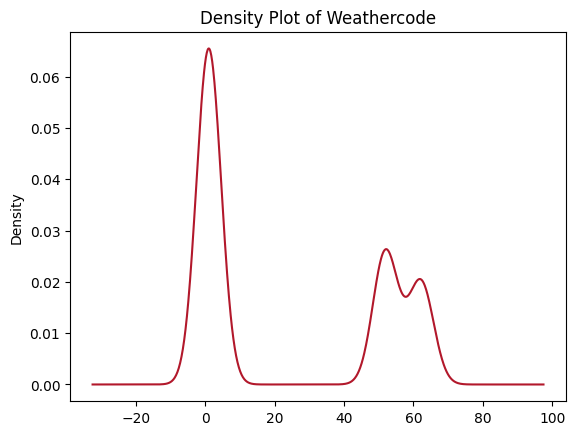

In [19]:
df.weathercode.plot.density(color='#b2182b')
plt.title(f'Density Plot of Weathercode')

Scatter plot of Weather and Daylight Duration

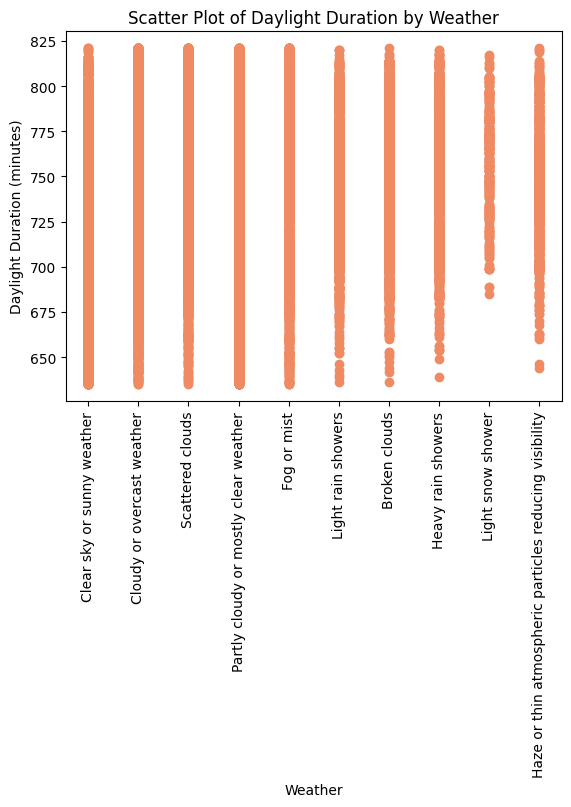

In [20]:

plt.scatter(df['weather'], df['daylight_duration_minutes'], color = '#ef8a62')
plt.xlabel('Weather')
plt.xticks(rotation =90)
plt.ylabel('Daylight Duration (minutes)')
plt.title('Scatter Plot of Daylight Duration by Weather')
plt.show()

Consolidated Density plot of weathercodes for all cities

Text(0.5, 1.0, 'Density Plot of Weathercode')

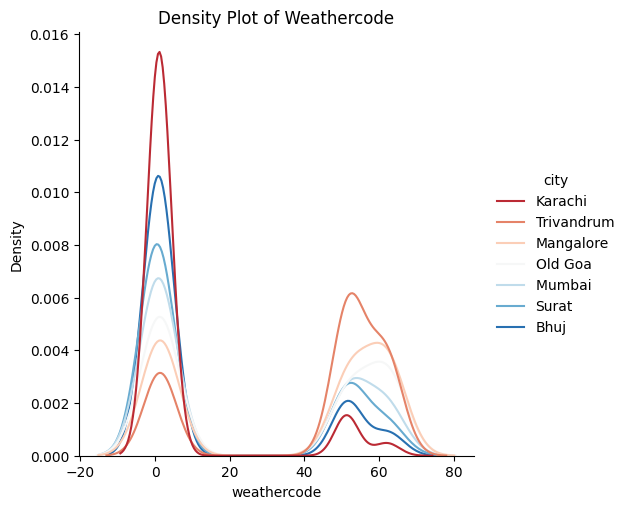

In [21]:
sns.displot(df, x="weathercode", hue='city', kind = 'kde', palette = 'RdBu')
plt.title(f'Density Plot of Weathercode')

Barchart for count of values of Weathercodes

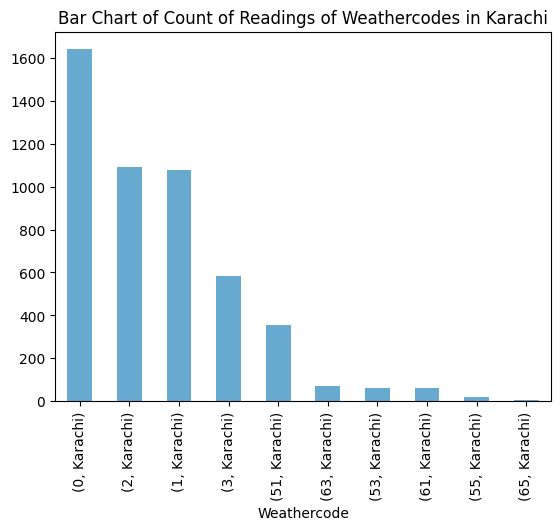

In [22]:
Karachi_data.plot.bar(color='#67a9cf')
plt.title(f'Bar Chart of Count of Readings of Weathercodes in Karachi')
plt.xlabel('Weathercode')
plt.show()

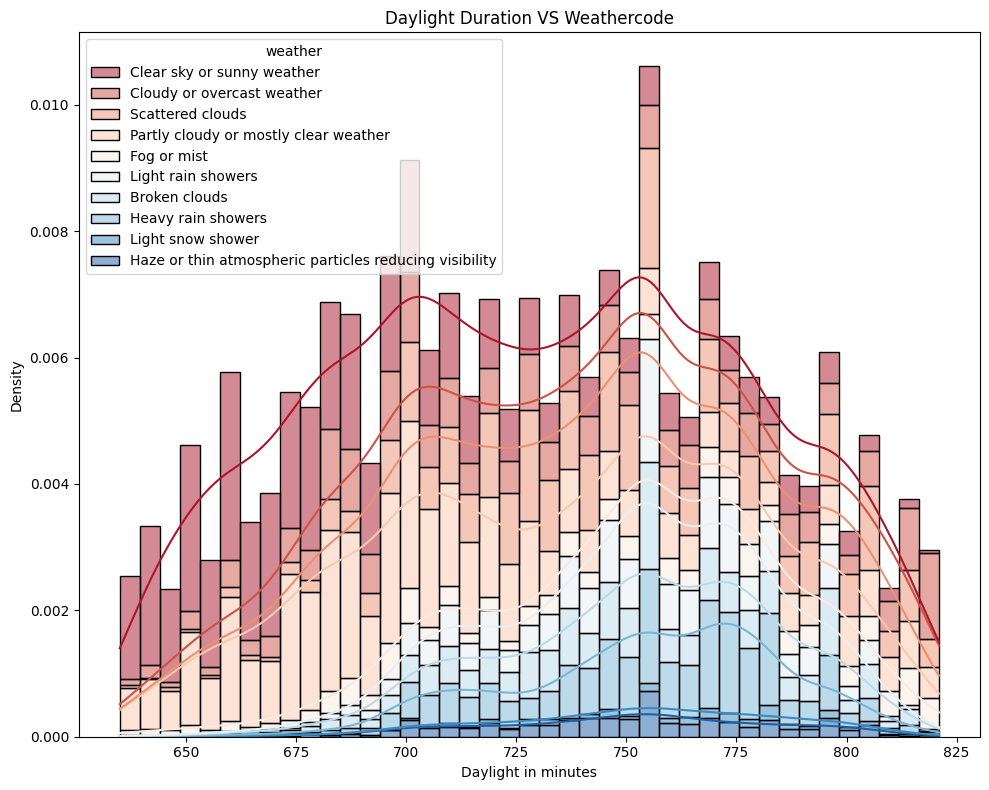

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.histplot(data=df, x='daylight_duration_minutes', kde=True, hue='weather', palette='RdBu', multiple='stack', stat='density')

ax.set_title('Daylight Duration VS Weathercode')
ax.set_xlabel('Daylight in minutes')
ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

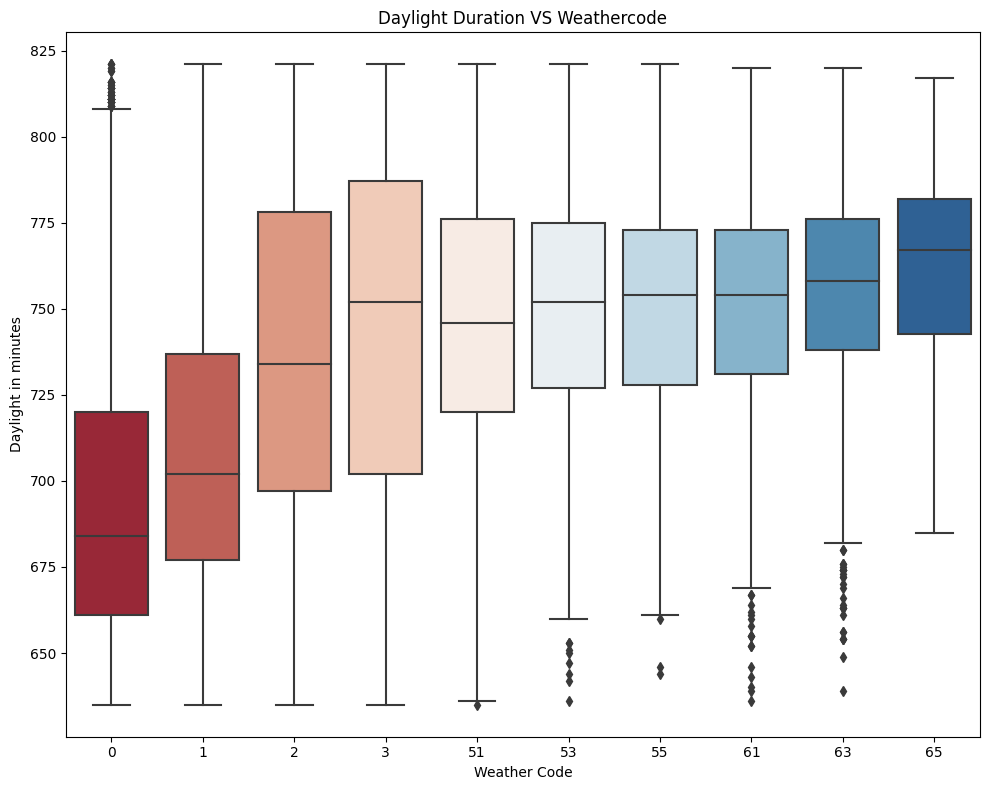

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

sns.boxplot(data=df, x='weathercode', y='daylight_duration_minutes', palette='RdBu')

ax.set_title('Daylight Duration VS Weathercode')
ax.set_xlabel('Weather Code')
ax.set_ylabel('Daylight in minutes')

plt.tight_layout()
plt.show()

<ipython-input-25-c220b5fcde50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True, fmt='.2f', cmap='RdBu')


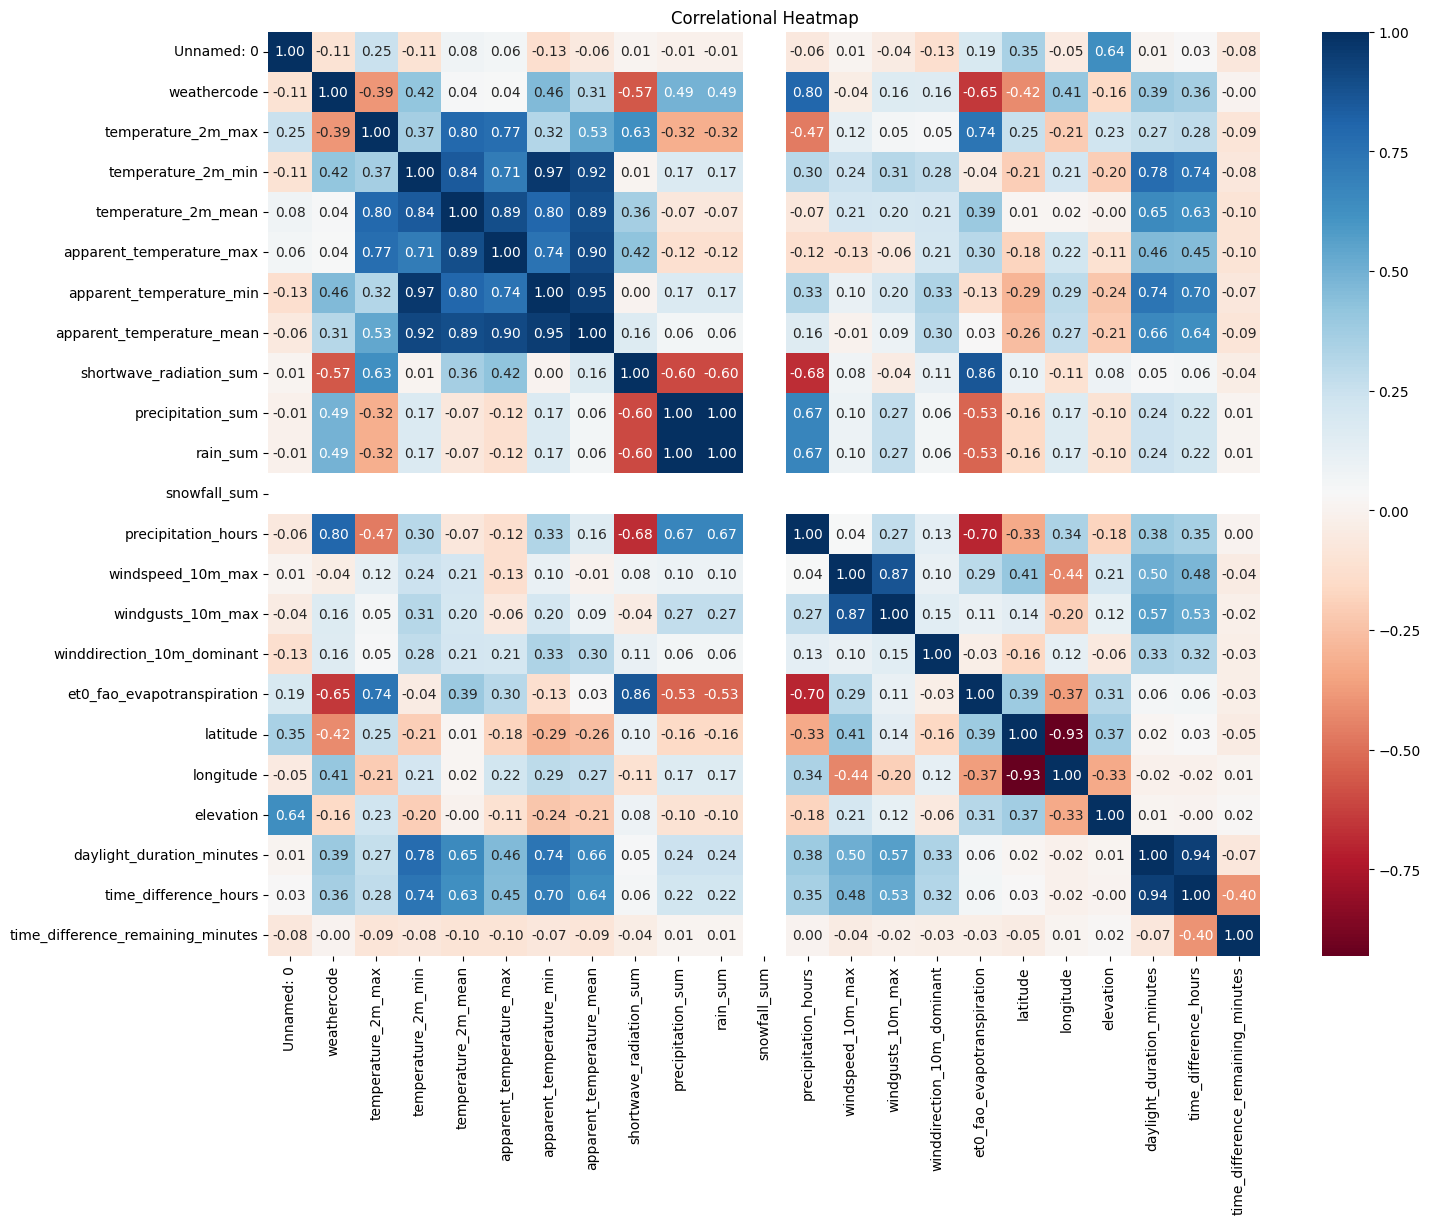

In [25]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot =True, fmt='.2f', cmap='RdBu')
plt.title('Correlational Heatmap')
plt.show()

# Findings

1.   Most of the reading in the dataset are Of Weathcode 0 (Clear Sky or sunny weather), 1(Partially cloudy or mostly clear weather), 51(Scattered clouds) & 2(Cloudy or overcast weather).

2.   Most of the reading in the dataset for Karachi are Of Weathcode 0 (Clear Sky or sunny weather), 1(Partially cloudy or mostly clear weather) & 2(Cloudy or overcast weather).

3.   The correcaltion between weather and daylight duration is 0.39. Ref Heatmap.
4.   The height of the boxes is almost similar for weathercode 51-65 also the time frame is similar which suggests that the average daylight duration might not be significantly different among these weathercodes.


